In [62]:
!pip install pandas
!pip install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/0d/61/b741990b429341bac1af5f5c645ee7aaa3bbe7daf3418d283c92c4b5ee82/matplotlib-3.2.1-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/81/c5/9831f281c6fb57945e83fdf39ff036cacfdc84aa1988bb3150b330533050/kiwisolver-1.2.0-cp37-cp37m-macosx_10_9_x86_64.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from __future__ import division

import argparse
import os
from others.logging import init_logger
from train_abstractive import validate_abs, train_abs, baseline, test_abs, test_text_abs, load_models_abs
from train_extractive import train_ext, validate_ext, test_ext
from prepro import data_builder
import glob, os
from rouge import Rouge

In [3]:
import summarizer

In [32]:
device_id = -1
args = argparse.Namespace(accum_count=1, 
                          alpha=0.95, 
                          batch_size=32, 
                          beam_size=5, 
                          bert_data_path='../bert_data/cnndm', 
                          beta1=0.9, 
                          beta2=0.999, 
                          block_trigram=True, 
                          dec_dropout=0.2, 
                          dec_ff_size=2048, 
                          dec_heads=8, 
                          dec_hidden_size=768, 
                          dec_layers=6, 
                          enc_dropout=0.2, 
                          enc_ff_size=512, 
                          enc_hidden_size=512, 
                          enc_layers=6, 
                          encoder='bert', 
                          ext_dropout=0.2, 
                          ext_ff_size=2048, 
                          ext_heads=8, 
                          ext_hidden_size=768, 
                          ext_layers=2, 
                          finetune_bert=True, 
                          generator_shard_size=32, 
                          gpu_ranks=[0], 
                          label_smoothing=0.1, 
                          large=False, 
                          load_from_extractive='', 
                          log_file='../logs/val_abs_bert_cnndm', 
                          lower=True, 
                          lr=1, 
                          lr_bert=0.002, 
                          lr_dec=0.002, 
                          max_grad_norm=0, 
                          max_length=70, 
                          max_pos=512, 
                          max_src_nsents=100, 
                          max_src_ntokens_per_sent=200, 
                          max_tgt_len=140, 
                          max_tgt_ntokens=500, 
                          min_length=10, min_src_nsents=3, 
                          min_src_ntokens_per_sent=5, 
                          min_tgt_ntokens=5, 
                          mode='test_text', 
                          model_path='../models/', 
                          optim='adam', 
                          param_init=0, 
                          param_init_glorot=True, 
                          recall_eval=False, 
                          report_every=1, 
                          report_rouge=False, 
                          result_path='../results/abs_bert_cnndm_sample', 
                          save_checkpoint_steps=5, 
                          seed=666, 
                          sep_optim=True, 
                          shard_size=2000, 
                          share_emb=False, 
                          task='abs', 
                          temp_dir='../temp', 
                          test_all=False, 
                          test_batch_size=500, 
                          test_from='../models/CNN_DailyMail_Abstractive/model_step_148000.pt', 
                          test_start_from=-1, 
                          train_from='', 
                          train_steps=1000, 
                          use_bert_basic_tokenizer=False, 
                          use_bert_emb=False, 
                          use_interval=True, 
                          visible_gpus='-1', 
                          warmup_steps=8000, 
                          warmup_steps_bert=8000, 
                          warmup_steps_dec=8000, 
                          world_size=1)

print(args.task, args.mode) 

r = Rouge()
cp = args.test_from
try:
    step = int(cp.split('.')[-2].split('_')[-1])
except:
    step = 0

args.bert_data_path= '../bert_data_test/cnndm'

abs test_text


In [5]:
predictor = load_models_abs(args, device_id, cp, step)

Namespace(accum_count=1, alpha=0.95, batch_size=32, beam_size=5, bert_data_path='../bert_data/cnndm', beta1=0.9, beta2=0.999, block_trigram=True, dec_dropout=0.2, dec_ff_size=2048, dec_heads=8, dec_hidden_size=768, dec_layers=6, enc_dropout=0.2, enc_ff_size=512, enc_hidden_size=512, enc_layers=6, encoder='bert', ext_dropout=0.2, ext_ff_size=2048, ext_heads=8, ext_hidden_size=768, ext_layers=2, finetune_bert=True, generator_shard_size=32, gpu_ranks=[0], label_smoothing=0.1, large=False, load_from_extractive='', log_file='../logs/val_abs_bert_cnndm', lower=True, lr=1, lr_bert=0.002, lr_dec=0.002, max_grad_norm=0, max_length=70, max_pos=512, max_src_nsents=100, max_src_ntokens_per_sent=200, max_tgt_len=140, max_tgt_ntokens=500, min_length=10, min_src_nsents=3, min_src_ntokens_per_sent=5, min_tgt_ntokens=5, mode='test_text', model_path='../models/', optim='adam', param_init=0, param_init_glorot=True, recall_eval=False, report_every=1, report_rouge=False, result_path='../results/abs_bert_cn

In [53]:
import pandas as pd
import numpy as np

cases_with_head2 = pd.read_csv('../data/cases_NC_with_head_ext2.csv.zip', encoding="utf-8", low_memory=False)

In [83]:
number_of_cases = 10
cases_part = cases_with_head2.head(number_of_cases)[['bs_head', 'bs_opinion']].copy()
cases_part.head(number_of_cases)

,bs_head,bs_opinion
0,In an indictment for murder the length and dep...,"A majority of the court, therefore, being of t..."
1,Where damages are sought to be recovered for t...,"Walker, J.The grievance alleged by the plainti..."
2,Where a deed or instrument conveying land refe...,"Hoke, J.On the hearing it appeared that C. G. ..."
3,Lands devised for life with contingent limitat...,"HoKE, J.The facts pertinent to the inquiry and..."
4,"The Legislature, in 1915, authorized a certain...","Walker, J.,after stating tbe facts, as above: ..."
5,The policy of our law with respect to mechanic...,"AlleN, J.The public policy of this State, rela..."
6,"Upon motion to nonsuit in a criminal action, t...",".BtíowN, J.The motion to nonsuit was properly ..."
7,The effect of an amendment to a statute is to ...,"Beown, J.Defendant was convicted at tbe June T..."
8,Upon a motion for a severance under an indictm...,"ClaRK, C. J.There is no exception to evidence ..."
9,"The plaintiff and defendant contracted, among ...","AlleN, J.Conceding -that the contract required..."


In [84]:
def summarize(row):
    opinion = row['bs_opinion']
    data_builder.str_format_to_bert(opinion, args, '../bert_data_test/cnndm.test.0.bert.pt') 
    tgt, time_used = test_text_abs(args, device_id, cp, step, predictor)
    sentences = tgt.split('<q>')
    sentences = [sent.capitalize() for sent in sentences]
    sentences = '. '.join(sentences).rstrip()
    sentences = sentences.replace(' ,', ',')
    sentences = sentences+'.'
    row['summary'] = sentences
    row['time_used'] = round(float(time_used), 2)
    row['score'] = r.get_scores(sentences, opinion, avg=True)['rouge-l']['p']
    return row

cases_part = cases_with_head2.                                        \
                head(number_of_cases)[['bs_head', 'bs_opinion']].     \
                copy().                                               \
                apply(summarize, axis=1)

In [85]:
cases_part

,bs_head,bs_opinion,summary,time_used,score
0,In an indictment for murder the length and dep...,"A majority of the court, therefore, being of t...",A majority of the court ruled that the sentenc...,3.54,0.766667
1,Where damages are sought to be recovered for t...,"Walker, J.The grievance alleged by the plainti...",The complaint is that the defendant failed to ...,7.34,0.866667
2,Where a deed or instrument conveying land refe...,"Hoke, J.On the hearing it appeared that C. G. ...","C. g. bailey and others, executors of the last...",7.68,0.906977
3,Lands devised for life with contingent limitat...,"HoKE, J.The facts pertinent to the inquiry and...","Fannie peterson, owner in fee simple of a lot ...",7.26,0.869565
4,"The Legislature, in 1915, authorized a certain...","Walker, J.,after stating tbe facts, as above: ...",Tbe is a misconception of tbe object and purpo...,7.26,0.906977
5,The policy of our law with respect to mechanic...,"AlleN, J.The public policy of this State, rela...","The first statute ( chapter 117, laws 1868-9 )...",7.40,0.822222
6,"Upon motion to nonsuit in a criminal action, t...",".BtíowN, J.The motion to nonsuit was properly ...",Danny cevallos : on this motion the evidence m...,7.25,0.791667
7,The effect of an amendment to a statute is to ...,"Beown, J.Defendant was convicted at tbe June T...",The defendant filed a plea in abatement upon t...,7.21,0.897436
8,Upon a motion for a severance under an indictm...,"ClaRK, C. J.There is no exception to evidence ...",The granting of a severance rests in the sound...,5.98,0.975610
9,"The plaintiff and defendant contracted, among ...","AlleN, J.Conceding -that the contract required...",The contract required the defendant to furnish...,5.80,0.869565


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce7c1f5990>,
      dtype=object)

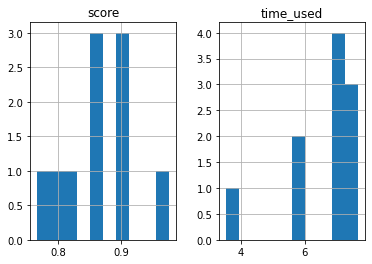

In [88]:
import matplotlib.pyplot as plt
cases_part[['score', 'time_used']].hist()